In [74]:
import sys
sys.path.append('data_generation')
sys.path.append('util')
sys.path.append('neural_networks')
sys.path.append('experiments')

In [75]:
import tensorflow as tf
from dataset_manager import DataSetManager
from dataset import DataSetKey
from my_enums import Pricers,Generators
from ds_spec import DsSpecs
from experiment_manager import ExperimentManager
from my_config import Config
import os
from multiprocessing import Process
import time
import pandas as pd
import pickle
from metrics import Metrics
import matplotlib.pyplot as plt
import itertools

Load Dataset Manager and Experiment Manager (Connections to raw data, and trained networks)

In [76]:
dsm = DataSetManager.get_default_in_mem_DSM()

Loading DataSetKey(Generators.Uniform, Pricers.JuZhong, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_0
Loading DataSetKey(Generators.Uniform, Pricers.Whaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_1
Loading DataSetKey(Generators.Uniform, Pricers.JuZhongWhaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_2
Loading DataSetKey(Generators.Halton, Pricers.JuZhong, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_3
Loading DataSetKey(Generators.Halton, Pricers.Whaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_4
Loading DataSetKey(Generators.Halton, Pricers.JuZhongWhaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Data\datasets\ds_5
Loading DataSetKey(Ge

In [77]:
em = ExperimentManager.create_or_load(os.path.join(Config.experiments_dir,'set1'),dsm)

In [78]:
em_df = em.get_info_df()

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_0\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_1\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_2\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_3\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_4\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_5\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_6\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_7\model\model-50


INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_66\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_67\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_68\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_69\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_70\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_71\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_72\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_73\model\m

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_131\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_132\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_133\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_134\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_135\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_136\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_137\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_138

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_196\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_197\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_198\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_199\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_200\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_201\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_202\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_203

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_261\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_262\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_263\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_264\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_265\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_266\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_267\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_268

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_326\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_327\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_328\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_329\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_330\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_331\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_332\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_333

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_391\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_392\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_393\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_394\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_395\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_396\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_397\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_398

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_456\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_457\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_458\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_459\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_460\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_461\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_462\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_463

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_521\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_522\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_523\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_524\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_525\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_526\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_527\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_528

In [79]:
em_df

,Generator,American Pricer,European Pricer,Specs,nodes,Activation Funcs,drop rates,epochs run,train_size,exp_dir
0,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,[5],[relu],[0.25],50,2000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
1,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,[5],[leaky_relu],[0.25],50,2000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
2,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,[5],[elu],[0.25],50,2000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
3,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,[5],[sigmoid],[0.25],50,2000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
4,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,[5],[tanh],[0.25],50,2000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
...,...,...,...,...,...,...,...,...,...,...
535,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,"[20, 20]","[tanh, relu]","[0.25, 0.25]",50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
536,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,"[20, 20]","[tanh, leaky_relu]","[0.25, 0.25]",50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
537,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,"[20, 20]","[tanh, elu]","[0.25, 0.25]",50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...
538,Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1,"[20, 20]","[tanh, sigmoid]","[0.25, 0.25]",50,25000,C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\E...


Compute $r^2$ for every possible architecture (all layers with all activations)

In [80]:
def get_arch_r2s(archs,dskey,learn_rate,train_size,epoch,exp_man):
    exps = [exp_man.get_exp(dskey,(arch,learn_rate),train_size) for arch in archs]
    r2s = [exp.get_metric(Metrics.r2,exp.get_outsample_data(1000),epoch) for exp in exps]
    return pd.DataFrame({'nodes':[tuple(n for n,af,dr in arch) for arch in archs],
                         'afs':[tuple(af.__name__ for n,af,dr in arch) for arch in archs],
                         'arch':archs,
                         'r2':r2s})

In [81]:
def get_layer_set_r2s(layer_nodes,afs,dskey,learn_rate,train_size,epoch,exp_man):
    af_sets = [tuple(j) for j in set(list(itertools.product(afs,repeat = len(layer_nodes))))]
    archs = [tuple(zip(layer_nodes,afs,tuple(0.25 for n in layer_nodes))) for afs in af_sets]
    return get_arch_r2s(archs,dskey,learn_rate,train_size,epoch,exp_man)

In [82]:
def get_all_r2s(layer_sets,afs,dskey,learn_rate,train_size,epoch,exp_man):
    dfs = [get_layer_set_r2s(layer_set,afs,dskey,learn_rate,train_size,epoch,exp_man)
           for layer_set in layer_sets]
    return pd.concat(dfs,axis=0).reset_index(drop=True)

In [83]:
dskey = DataSetKey(Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1)
learn_rate = 0.1
layer_sets = [(5,),(10,),(20,),(5,5),(10,10),(20,20)]
afs = [tf.nn.relu,tf.nn.leaky_relu,tf.nn.elu,tf.nn.sigmoid,tf.nn.tanh]
df = get_all_r2s(layer_sets,afs,dskey,learn_rate,25000,50,em)

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_454\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_450\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_453\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_451\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_452\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_459\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_455\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_458

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_519\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_515\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_535\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_539\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_527\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_533\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_521\model\model-50
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_530

In [84]:
df.drop(['arch'],axis=1)

,nodes,afs,r2
0,"(5,)","(tanh,)",59.174561
1,"(5,)","(relu,)",72.179726
2,"(5,)","(sigmoid,)",39.445938
3,"(5,)","(leaky_relu,)",65.055298
4,"(5,)","(elu,)",61.379875
...,...,...,...
85,"(20, 20)","(sigmoid, leaky_relu)",73.839119
86,"(20, 20)","(elu, relu)",92.974785
87,"(20, 20)","(elu, tanh)",81.476578
88,"(20, 20)","(relu, elu)",92.512718


Find the best activation funcs for each Layer Architecture

In [85]:
idx = df.groupby(['nodes'])['r2'].transform(max) == df['r2']
df[idx].drop(['arch'],axis=1)

,nodes,afs,r2
1,"(5,)","(relu,)",72.179726
6,"(10,)","(relu,)",71.259880
11,"(20,)","(relu,)",81.437889
36,"(5, 5)","(elu, relu)",79.184395
61,"(10, 10)","(elu, relu)",86.566368
80,"(20, 20)","(relu, leaky_relu)",94.099197


Plot the relationship between Training Size and $r^2$ at different epochs for the optimal architectures of each neuron setwork

In [86]:
df2 = df[idx].reset_index(drop=True)
train_sizes = [2000,5000,10000,15000,20000,25000]
epochs = [10,20,30,40,50]
all_r2s = []
for i in range(df2.shape[0]):
    epoch_r2s = []
    model_key = (df2['arch'][i],learn_rate)
    exps = [em.get_exp(dskey,model_key,train_size) for train_size in train_sizes]
    for j in epochs:
        r2s = [exp.get_metric(Metrics.r2,exp.get_outsample_data(1000),j) for exp in exps]
        epoch_r2s.append(r2s)
    all_r2s.append(epoch_r2s)
        #layer_axes[i].plot(train_sizes,r2s,label='epoch_{}'.format(j))
    #layer_axes[i].legend()

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_0\model\model-10
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_90\model\model-10
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_180\model\model-10
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_270\model\model-10
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_360\model\model-10
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_450\model\model-10
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_0\model\model-20
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_90\model

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_460\model\model-10
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_10\model\model-20
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_100\model\model-20
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_190\model\model-20
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_280\model\model-20
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_370\model\model-20
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_460\model\model-20
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_10\m

INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_410\model\model-20
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_500\model\model-20
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_50\model\model-30
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_140\model\model-30
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_230\model\model-30
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_320\model\model-30
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_410\model\model-30
INFO:tensorflow:Restoring parameters from C:\Users\Kaiqi Wu\Desktop\1229\Final_Project\Experiments\set1\exp_500\

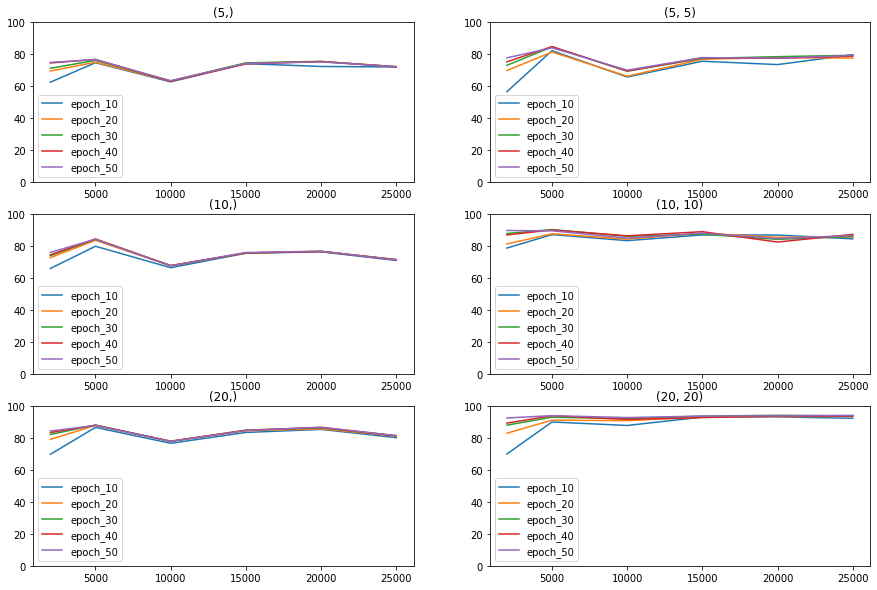

In [87]:
fig,axes = plt.subplots(3,2,figsize=(15,10))
layer_sets = [(5,),(10,),(20,),(5,5),(10,10),(20,20)]
layer_axes = [axes[0][0],axes[1][0],axes[2][0],axes[0][1],axes[1][1],axes[2][1]]
for i in range(len(all_r2s)):
    for epoch_r2s,epoch in zip(all_r2s[i],epochs):
        layer_axes[i].plot(train_sizes,epoch_r2s,label='epoch_{}'.format(epoch))
    layer_axes[i].legend()
    layer_axes[i].set_ylim(0, 100)
    layer_axes[i].set_title("{}".format(layer_sets[i]))